# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
income_data[:10]

['Middle Class',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Middle Class',
 'Middle Class']

In [5]:
# Z -> N(0, 1)
# N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [6]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Economic Status' : income_data,
        'Height' : height,
        'Weight' : weight,
        'Age' : np.floor(age).astype(int), # Redondear a la baja y convertir a tipo int
        'Income' : income
    }
)

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,160.899060,84.633995,35,21033.664812
1,Male,Poor,144.933135,105.348798,19,19547.737151
2,Female,Middle Class,182.101739,64.269192,44,20621.090409
3,Female,Middle Class,148.424605,50.852176,42,19149.598531
4,Female,Poor,114.119723,46.069002,7,20487.929511


## Agrupación de datos

In [8]:
grouped_gender = data.groupby('Gender')

In [9]:
grouped_gender.groups

{'Female': [0, 2, 3, 4, 5, 7, 10, 11, 14, 15, 18, 19, 20, 23, 25, 29, 32, 33, 37, 40, 42, 43, 44, 49, 52, 53, 55, 56, 57, 58, 59, 60, 62, 66, 68, 71, 72, 73, 75, 77, 79, 83, 84, 86, 87, 90, 92, 93, 95, 97, 98, 102, 107, 108, 111, 112, 113, 116, 118, 123, 125, 129, 130, 132, 133, 134, 135, 137, 138, 140, 141, 144, 145, 146, 150, 151, 152, 154, 158, 159, 160, 162, 163, 167, 169, 170, 176, 177, 180, 181, 182, 184, 185, 190, 191, 194, 195, 198, 201, 202, ...], 'Male': [1, 6, 8, 9, 12, 13, 16, 17, 21, 22, 24, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 41, 45, 46, 47, 48, 50, 51, 54, 61, 63, 64, 65, 67, 69, 70, 74, 76, 78, 80, 81, 82, 85, 88, 89, 91, 94, 96, 99, 100, 101, 103, 104, 105, 106, 109, 110, 114, 115, 117, 119, 120, 121, 122, 124, 126, 127, 128, 131, 136, 139, 142, 143, 147, 148, 149, 153, 155, 156, 157, 161, 164, 165, 166, 168, 171, 172, 173, 174, 175, 178, 179, 183, 186, 187, 188, 189, 192, 193, 196, ...]}

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight  Age        Income
0    Female    Middle Class  160.899060  84.633995   35  21033.664812
2    Female    Middle Class  182.101739  64.269192   44  20621.090409
3    Female    Middle Class  148.424605  50.852176   42  19149.598531
4    Female            Poor  114.119723  46.069002    7  20487.929511
5    Female            Rich  191.873319  41.523370   25  20321.553812
..      ...             ...         ...        ...  ...           ...
493  Female            Poor  222.462070  10.726705   22  20345.911641
494  Female            Poor  175.447296  79.744560   15  19382.530277
496  Female            Rich  149.097302  50.840780   41  18434.324846
498  Female            Poor  152.135665  47.411175   29  20834.468677
499  Female    Middle Class  175.217261  52.861315   40  19040.746328

[245 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  Age        Income
1     Male            Poor  144.933135  105.348798   1

In [11]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,160.899060,84.633995,35,21033.664812
2,Female,Middle Class,182.101739,64.269192,44,20621.090409
3,Female,Middle Class,148.424605,50.852176,42,19149.598531
4,Female,Poor,114.119723,46.069002,7,20487.929511
5,Female,Rich,191.873319,41.523370,25,20321.553812
...,...,...,...,...,...,...
493,Female,Poor,222.462070,10.726705,22,20345.911641
494,Female,Poor,175.447296,79.744560,15,19382.530277
496,Female,Rich,149.097302,50.840780,41,18434.324846
498,Female,Poor,152.135665,47.411175,29,20834.468677


In [12]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [13]:
len(double_group) # 6 grupos, para cada uno de los generos y para cada estado economico

6

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight  Age        Income
0    Female    Middle Class  160.899060  84.633995   35  21033.664812
2    Female    Middle Class  182.101739  64.269192   44  20621.090409
3    Female    Middle Class  148.424605  50.852176   42  19149.598531
10   Female    Middle Class  138.911997  43.380673   35  19855.020576
18   Female    Middle Class  102.804413  54.455039   16  21144.880051
..      ...             ...         ...        ...  ...           ...
476  Female    Middle Class  171.981754  85.592291   15  18158.111100
478  Female    Middle Class  179.425617  28.551637    7  20240.689645
480  Female    Middle Class  150.599388  27.958572   21  21472.536965
484  Female    Middle Class  175.031071  45.218174   32  21251.374649
499  Female    Middle Class  175.217261  52.861315   40  19040.746328

[82 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height     Weight  Age        Income
4    Female          

## Operaciones sobre datos agrupados

In [15]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     13128.048165  4785.178739  2396  1.613626e+06
       Poor             13376.218241  5366.223579  2377  1.618869e+06
       Rich             13409.548949  4967.659225  2466  1.617422e+06
Male   Middle Class     13793.019220  5539.734553  2479  1.742079e+06
       Poor             12390.029673  5100.434200  2400  1.543543e+06
       Rich             14191.598386  5734.420956  2554  1.741623e+06

In [16]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.098148  58.355838  29.219512  19678.361169
       Poor             165.138497  66.249674  29.345679  19986.039736
       Rich             163.531085  60.581210  30.073171  19724.664339
Male   Middle Class     156.738855  62.951529  28.170455  19796.348322
       Poor             158.846534  65.390182  30.769231  19789.013995
       Rich             159.456162  64.431696  28.696629  19568.798457

In [17]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               81
        Rich               82
Male    Middle Class       88
        Poor               78
        Rich               89
dtype: int64

In [18]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      82.0  160.098148  32.080601   81.414307  141.626901   
       Poor              81.0  165.138497  28.128706   94.328615  145.990495   
       Rich              82.0  163.531085  29.228077   97.984974  148.798053   
Male   Middle Class      88.0  156.738855  27.388396  101.504986  140.186695   
       Poor              78.0  158.846534  30.776987   76.250419  139.024493   
       Rich              89.0  159.456162  29.849858   90.777749  142.991606   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     162.356400  180.954481  246.008623   82.0  58.355838   
       Poor             165.103861  187.747009  224.880692   81.0  66.249674   
       Rich             164.228683  181.940665  257.712880   82.0  60.581210   
Male   Middle Class     152.748933  171.285866  242.825819   88.0  62.951529   
       Poor             157.917022  179.778596  224.108673   78.0  65.390182   
       Rich             162.547375  179.067261  228.246985   89.0  64.431696   

                        ...    Age       Income                             \
                        ...    75%   max  count          mean          std   
Gender Economic Status  ...                                                  
Female Middle Class     ...  35.75  56.0   82.0  19678.361169  1137.120560   
       Poor             ...  38.00  59.0   81.0  19986.039736   979.971638   
       Rich             ...  37.75  57.0   82.0  19724.664339  1104.070816   
Male   Middle Class     ...  39.00  54.0   88.0  19796.348322   960.422095   
       Poor             ...  37.00  66.0   78.0  19789.013995   970.598945   
       Rich             ...  36.00  52.0   89.0  19568.798457   989.629687   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class     18019.397111  18654.706711  19473.164062   
       Poor             18027.132749  19075.993338  20279.375024   
       Rich             18018.047136  18760.973531  19820.122289   
Male   Middle Class     18023.926973  19037.755538  19799.851212   
       Poor             18070.899159  18970.107145  19945.738048   
       Rich             18070.523633  18697.878498  19582.189910   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20841.853333  21472.536965  
       Poor             20633.632575  21450.513748  
       Rich             20718.275294  21489.252653  
Male   Middle Class     20627.225721  21488.445432  
       Poor             20502.779551  21463.933012  
       Rich             20372.545943  21440.881499  

[6 rows x 32 columns]

In [19]:
grouped_income = double_group['Income']

In [20]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      82.0  19678.361169  1137.120560  18019.397111   
       Poor              81.0  19986.039736   979.971638  18027.132749   
       Rich              82.0  19724.664339  1104.070816  18018.047136   
Male   Middle Class      88.0  19796.348322   960.422095  18023.926973   
       Poor              78.0  19789.013995   970.598945  18070.899159   
       Rich              89.0  19568.798457   989.629687  18070.523633   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18654.706711  19473.164062  20841.853333  21472.536965  
       Poor             19075.993338  20279.375024  20633.632575  21450.513748  
       Rich             18760.973531  19820.122289  20718.275294  21489.252653  
Male   Middle Class     19037.755538  19799.851212  20627.225721  21488.445432  
       Poor             18970.107145  19945.738048  20502.779551  21463.933012  
       Rich             18697.878498  19582.189910  20372.545943  21440.881499

In [21]:
double_group.aggregate(
    {
        'Income' : np.sum,
        'Age' : np.mean,
        'Height' : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.613626e+06  29.219512  32.080601
       Poor             1.618869e+06  29.345679  28.128706
       Rich             1.617422e+06  30.073171  29.228077
Male   Middle Class     1.742079e+06  28.170455  27.388396
       Poor             1.543543e+06  30.769231  30.776987
       Rich             1.741623e+06  28.696629  29.849858

In [22]:
double_group.aggregate(
    {
        'Age' : np.mean,
        'Height' : lambda h: np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.219512  5.021208
       Poor             29.345679  5.907396
       Rich             30.073171  5.629431
Male   Middle Class     28.170455  5.755616
       Poor             30.769231  5.194618
       Rich             28.696629  5.372207

In [23]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13128.048165  160.098148  32.080601  4785.178739   
       Poor             13376.218241  165.138497  28.128706  5366.223579   
       Rich             13409.548949  163.531085  29.228077  4967.659225   
Male   Middle Class     13793.019220  156.738855  27.388396  5539.734553   
       Poor             12390.029673  158.846534  30.776987  5100.434200   
       Rich             14191.598386  159.456162  29.849858  5734.420956   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female Middle Class     58.355838  23.533189  2396  29.219512  11.045388   
       Poor             66.249674  24.979556  2377  29.345679  12.054211   
       Rich             60.581210  24.511923  2466  30.073171  10.467800   
Male   Middle Class     62.951529  25.921016  2479  28.170455  13.304758   
       Poor             65.390182  23.726248  2400  30.769231  12.402265   
       Rich             64.431696  28.328969  2554  28.696629  11.618368   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.613626e+06  19678.361169  1137.120560  
       Poor             1.618869e+06  19986.039736   979.971638  
       Rich             1.617422e+06  19724.664339  1104.070816  
Male   Middle Class     1.742079e+06  19796.348322   960.422095  
       Poor             1.543543e+06  19789.013995   970.598945  
       Rich             1.741623e+06  19568.798457   989.629687

In [24]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.021208  2.494985  2.661683  17.411927
       Poor             5.907396  2.668680  2.449643  20.521578
       Rich             5.629431  2.486709  2.890602  17.975340
Male   Middle Class     5.755616  2.442508  2.129456  20.730255
       Poor             5.194618  2.773866  2.496994  20.520422
       Rich             5.372207  2.287296  2.483930  19.885894

## Filtrado de datos

In [25]:
double_group['Age'].filter(lambda x: x.sum() > 2400)

5      25
8      40
9      33
13     25
15     32
       ..
490    20
492    37
495    14
496    41
497    24
Name: Age, Length: 259, dtype: int32

## Transformación de variables

In [26]:
zscore = lambda x: (x - x.mean())/x.std()

In [27]:
z_group = double_group.transform(zscore)

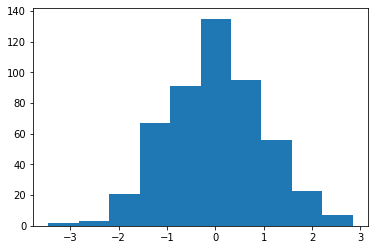

In [28]:
plt.hist(z_group['Age'])
plt.show()

In [29]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [30]:
double_group.transform(fill_na_mean) # En el caso de que hubiera algun NA

,Height,Weight,Age,Income
0,160.899060,84.633995,35,21033.664812
1,144.933135,105.348798,19,19547.737151
2,182.101739,64.269192,44,20621.090409
3,148.424605,50.852176,42,19149.598531
4,114.119723,46.069002,7,20487.929511
...,...,...,...,...
495,149.098888,88.353863,14,18352.517473
496,149.097302,50.840780,41,18434.324846
497,242.825819,47.892529,24,20891.419650
498,152.135665,47.411175,29,20834.468677


## Operaciones diversas muy útiles

In [31]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,160.899060,84.633995,35,21033.664812
1,Male,Poor,144.933135,105.348798,19,19547.737151
4,Female,Poor,114.119723,46.069002,7,20487.929511
5,Female,Rich,191.873319,41.523370,25,20321.553812
8,Male,Middle Class,179.554394,47.558040,40,19771.224208
16,Male,Rich,176.830685,73.758398,19,18481.982516


In [32]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
461,Male,Rich,149.618562,19.349499,49,21346.207096
491,Male,Poor,188.265933,97.941829,66,19620.286761
496,Female,Rich,149.097302,50.840780,41,18434.324846
497,Male,Middle Class,242.825819,47.892529,24,20891.419650
498,Female,Poor,152.135665,47.411175,29,20834.468677
499,Female,Middle Class,175.217261,52.861315,40,19040.746328


In [33]:
double_group.nth(32)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     138.094037  80.087159   32  19046.717757
       Poor             145.833764  53.401128   33  18395.648610
       Rich             153.037423  65.620948   37  20189.491240
Male   Middle Class     188.018820  70.158151   30  21441.867080
       Poor             224.108673  42.787836   37  20361.253622
       Rich             164.582779  87.678603   43  18070.523633

In [34]:
double_group.nth(77)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     171.981754  85.592291   15  18158.111100
       Poor             168.194162  15.730478   41  21450.513748
       Rich             178.243632  22.903798   28  18039.500706
Male   Middle Class     138.496226  58.371685   11  20023.276331
       Poor             188.265933  97.941829   66  19620.286761
       Rich             128.687991  26.132515   24  19458.934855

In [35]:
data_sorted = data.sort_values(['Age', 'Income'])

In [36]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
262,Male,Poor,166.340129,70.836697,-12,20132.510785
196,Male,Rich,162.547375,97.684316,-8,20126.711719
38,Male,Rich,157.857226,54.728291,-1,18844.568195
148,Male,Middle Class,165.928988,57.229033,0,21219.632207
280,Male,Middle Class,127.287404,92.359844,2,21353.661353
417,Male,Middle Class,151.409519,46.702823,3,21043.441886
39,Male,Poor,168.353470,71.681229,4,20660.855403
330,Male,Rich,91.058137,40.052391,5,18437.142424
426,Female,Middle Class,121.672295,45.486243,5,21326.125733
286,Female,Middle Class,154.784445,49.392836,6,19017.214853


In [37]:
age_grouped = data_sorted.groupby('Gender')

In [38]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
262,Male,Poor,166.340129,70.836697,-12,20132.510785
426,Female,Middle Class,121.672295,45.486243,5,21326.125733


In [39]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
427,Female,Poor,146.281623,58.100321,59,20546.753511
491,Male,Poor,188.265933,97.941829,66,19620.286761


## Conjunto de entrenamiento y conjunto de testing

In [40]:
mainpath = '../../datasets/'
filename = 'customer-churn-model/Customer Churn Model.txt'
fullpath = os.path.join(mainpath, filename)

In [41]:
data = pd.read_csv(fullpath)

In [42]:
len(data)

3333

## Dividir utilizando la distribución normal

In [43]:
a = np.random.randn(len(data))

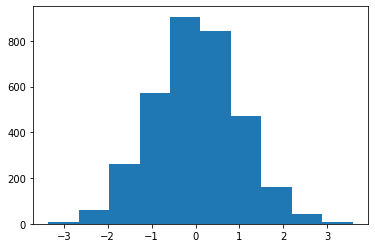

In [44]:
plt.hist(a)
plt.show()

In [45]:
check = (a < 0.75)

In [46]:
check

array([ True,  True,  True, ...,  True, False,  True])

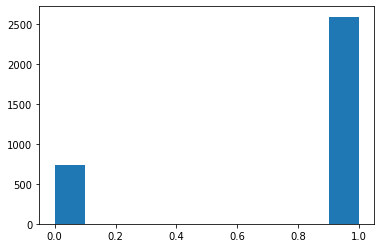

In [47]:
plt.hist(check.astype(int))
plt.show()

In [48]:
training = data[check]
testing = data[~check]

In [49]:
len(training)

2596

In [50]:
len(testing)

737

## Otra forma, con la librería sklearn

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train, test = train_test_split(data, test_size = 0.2)

In [53]:
len(train)

2666

In [54]:
len(test)

667

## Usando una función de shuffle

In [55]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [56]:
from sklearn.utils import shuffle

In [57]:
data = shuffle(data)

In [58]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [59]:
len(train_data)

2499

In [60]:
len(test_data)

834